# 作業 3-1


## 環境

請填寫當前執行使用的環境。

|環境|名稱|版本|
|-|-|-|
|作業系統|Windows|10|
|程式執行環境|jupyter notebook|1.0.0|
|python 版本|python3|3.7.5|
|安裝環境|pip|20.0.2|

## 安裝

請填寫安裝套件需要的指令

```sh
pip install -r requirements.txt
```

## 計算資源

請填寫執行程式所需要的計算資源，請確保所有資源限制在單一個人桌上型電腦且能夠以總市價低於 5 萬的手段取得。

|計算資源|答案|
|-|-|
|使用 CPU 核心數|1|
|記憶體需求|$\leq 1$GB|
|有無使用 GPU|無|
|GPU 版本|無|
|GPU 記憶體需求|$\leq 1$GB|

In [129]:
# 請勿更動此區塊程式碼

import time
import numpy as np
import pandas as pd

EXECUTION_START_TIME = time.time() # 計算執行時間

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## 資料分析與前處理

- 資料分析内容
- 資料視覺化
- 決定輸入特徵
- 處理缺失值
- 轉換類別
- 其他

### 資料分析內容

資料分析的内容為通過S&P500股市在2009/01/02-2017/12/29每天的相關資料（包含開市價、閉市價、最高價、最低價以及成交量）來預測此S&P500股市在2018/01/02-2018/12/31中每天會漲還是跌。


### 資料視覺化

對這train和test的五組資料進行時間序列的視覺化。

In [130]:
#把df['Date']的string資料形態轉換爲datetime
from datetime import datetime
date = []
for i in train_df['Date']:
    date.append(datetime.strptime(i, '%d-%b-%Y'))
train_df['Date'] = date

date_test = []
for j in test_df['Date']:
    date_test.append(datetime.strptime(j, '%d-%b-%Y'))
test_df['Date'] = date_test

Text(0.5, 1.0, 'Low Price')

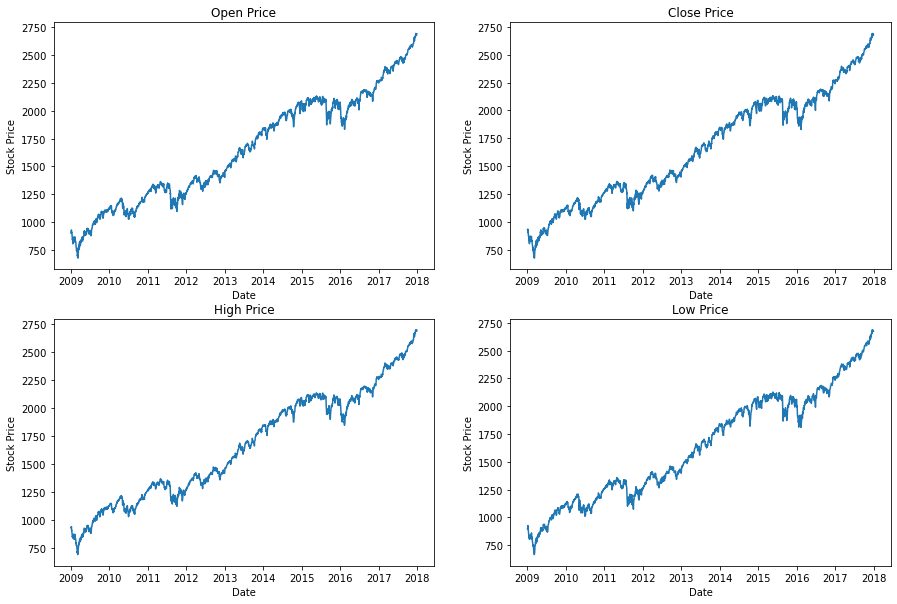

In [131]:
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
ax1.plot(train_df['Date'], train_df['Open Price'])
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price")
ax1.set_title("Open Price")

ax2.plot(train_df['Date'], train_df['Close Price'])
ax2.set_xlabel("Date")
ax2.set_ylabel("Stock Price")
ax2.set_title("Close Price")

ax3.plot(train_df['Date'], train_df['High Price'])
ax3.set_xlabel("Date")
ax3.set_ylabel("Stock Price")
ax3.set_title("High Price")

ax4.plot(train_df['Date'], train_df['Low Price'])
ax4.set_xlabel("Date")
ax4.set_ylabel("Stock Price")
ax4.set_title("Low Price")

Text(0.5, 1.0, 'Volume')

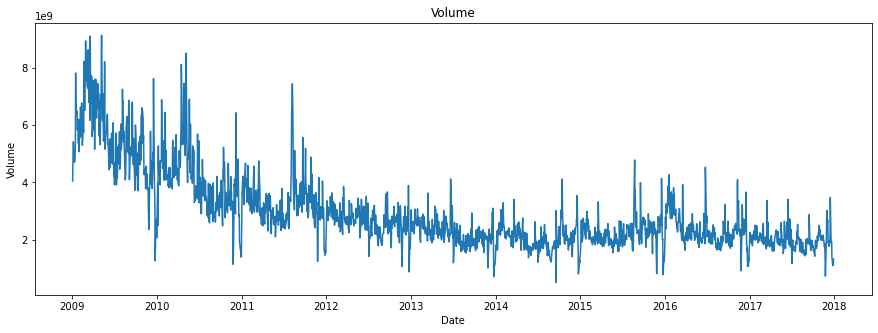

In [132]:
fig = plt.figure(figsize=(15, 5))
ax = plt.plot(train_df['Date'], train_df['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume')

Text(0.5, 1.0, 'Low Price')

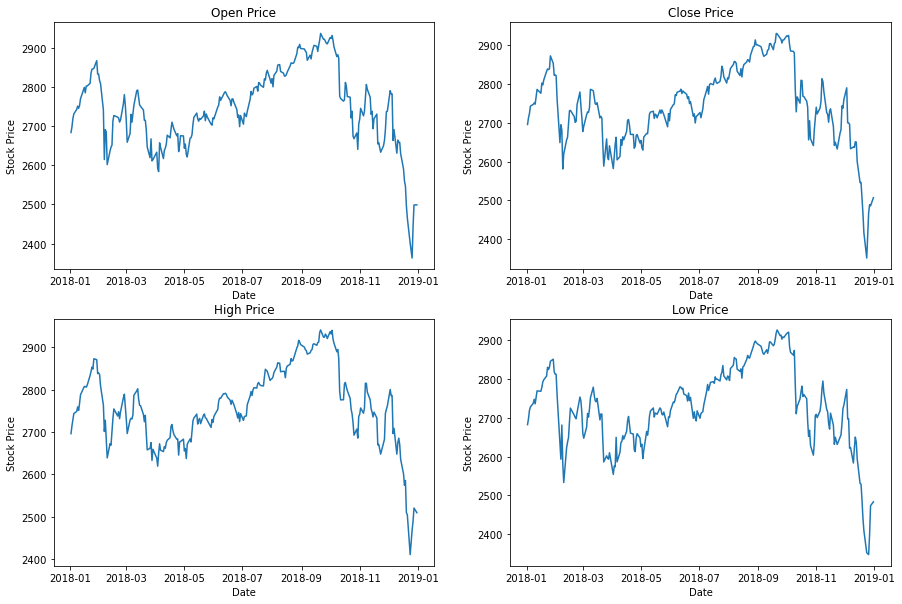

In [394]:
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
ax1.plot(test_df['Date'], test_df['Open Price'])
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price")
ax1.set_title("Open Price")

ax2.plot(test_df['Date'], test_df['Close Price'])
ax2.set_xlabel("Date")
ax2.set_ylabel("Stock Price")
ax2.set_title("Close Price")

ax3.plot(test_df['Date'], test_df['High Price'])
ax3.set_xlabel("Date")
ax3.set_ylabel("Stock Price")
ax3.set_title("High Price")

ax4.plot(test_df['Date'], test_df['Low Price'])
ax4.set_xlabel("Date")
ax4.set_ylabel("Stock Price")
ax4.set_title("Low Price")

Text(0.5, 1.0, 'Volume')

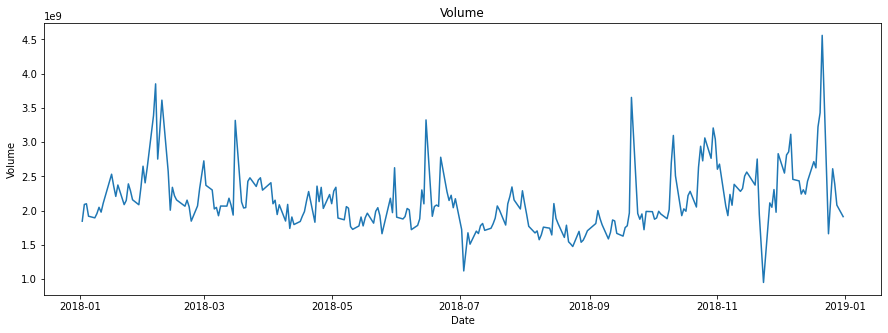

In [395]:
fig = plt.figure(figsize=(15, 5))
ax = plt.plot(test_df['Date'], test_df['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume')

### 決定輸入特徵
決定的輸入特徵為開市價、最高價、最低價，用來預測當天的收市價高於或低於當天的開市價。

In [420]:
train_x = []
for i in range(len(train_df)):
    train_x.append([train_df['Open Price'][i], train_df['High Price'][i], train_df['Low Price'][i]])

test_x = []
for i in range(len(test_df)):
    test_x.append([test_df['Open Price'][i], test_df['High Price'][i], test_df['Low Price'][i]])


In [421]:
train_x = np.array(train_x)
test_x = np.array(test_x)

### 處理缺失值
這份資料不需要處理缺失值。

### 轉換類別資料
train_y為當天S&P500股市的起落，0為跌(Open Price > Close Price)，1為漲(Open Price <= Close Price)。

In [162]:
train_y = []
for i in range(len(train_df)):
    if train_df['Open Price'][i] > train_df['Close Price'][i]:
        train_y.append(0)
    else:
        train_y.append(1)

test_y = []
for i in range(len(test_df)):
    if test_df['Open Price'][i] > test_df['Close Price'][i]:
        test_y.append(0)
    else:
        test_y.append(1)

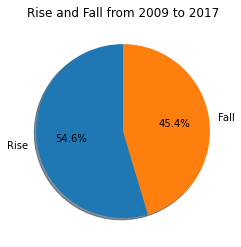

In [135]:
labels = ['Rise', 'Fall']
sizes = [train_y.count(1), train_y.count(0)]

plt.title("Rise and Fall from 2009 to 2017")
_ = plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

## 模型訓練

- **選擇模型**
- 計算**準確度（Accuracy）**

### 1. Logistic Regression

In [440]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
    
model = LogisticRegression(solver='newton-cg', random_state = 1012)
model.fit(train_x, train_y)
    
train_pred_y = model.predict(train_x)
train_acc = accuracy_score(train_y, train_pred_y)
test_pred_y = model.predict(test_x)
test_acc = accuracy_score(test_y, test_pred_y)

print("Train Accuracy: {}".format(train_acc))
print("Test Accuracy: {}".format(test_acc))

Train Accuracy: 0.8462897526501767
Test Accuracy: 0.8253968253968254


### 2.Neural Network

In [292]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_x, train_y, epochs=1000, batch_size=10)  

_, accuracy = model.evaluate(train_x, train_y)
print('Train Accuracy: %.2f' % (accuracy*100))

Epoch 1/1000
2264/2264 [==============================] - 1s 273us/step - loss: 73.9750 - accuracy: 0.4969
Epoch 2/1000
2264/2264 [==============================] - 0s 156us/step - loss: 1.7488 - accuracy: 0.4907
Epoch 3/1000
2264/2264 [==============================] - 0s 126us/step - loss: 1.8082 - accuracy: 0.4978
Epoch 4/1000
2264/2264 [==============================] - 0s 129us/step - loss: 1.7033 - accuracy: 0.4761
Epoch 5/1000
2264/2264 [==============================] - 0s 127us/step - loss: 1.7407 - accuracy: 0.5097
Epoch 6/1000
2264/2264 [==============================] - 0s 135us/step - loss: 1.5592 - accuracy: 0.4903
Epoch 7/1000
2264/2264 [==============================] - 0s 130us/step - loss: 1.6727 - accuracy: 0.5133
Epoch 8/1000
2264/2264 [==============================] - 0s 128us/step - loss: 1.7128 - accuracy: 0.4881
Epoch 9/1000
2264/2264 [==============================] - 0s 129us/step - loss: 1.5465 - accuracy: 0.4965
Epoch 10/1000
2264/2264 [====================

2264/2264 [==============================] - 0s 133us/step - loss: 0.5767 - accuracy: 0.7266
Epoch 78/1000
2264/2264 [==============================] - 0s 126us/step - loss: 0.6884 - accuracy: 0.7147
Epoch 79/1000
2264/2264 [==============================] - 0s 133us/step - loss: 0.6633 - accuracy: 0.7049
Epoch 80/1000
2264/2264 [==============================] - 0s 140us/step - loss: 0.6551 - accuracy: 0.7129
Epoch 81/1000
2264/2264 [==============================] - 0s 178us/step - loss: 0.9360 - accuracy: 0.6665
Epoch 82/1000
2264/2264 [==============================] - 0s 144us/step - loss: 0.8532 - accuracy: 0.6692
Epoch 83/1000
2264/2264 [==============================] - 0s 141us/step - loss: 0.6408 - accuracy: 0.6988
Epoch 84/1000
2264/2264 [==============================] - 0s 176us/step - loss: 0.6859 - accuracy: 0.6957
Epoch 85/1000
2264/2264 [==============================] - 0s 194us/step - loss: 0.6619 - accuracy: 0.7208
Epoch 86/1000
2264/2264 [==========================

Epoch 153/1000
2264/2264 [==============================] - 0s 110us/step - loss: 0.7793 - accuracy: 0.7169
Epoch 154/1000
2264/2264 [==============================] - 0s 115us/step - loss: 0.4706 - accuracy: 0.7747
Epoch 155/1000
2264/2264 [==============================] - 0s 135us/step - loss: 0.7890 - accuracy: 0.6921
Epoch 156/1000
2264/2264 [==============================] - 0s 140us/step - loss: 0.7954 - accuracy: 0.7054
Epoch 157/1000
2264/2264 [==============================] - 0s 142us/step - loss: 0.8708 - accuracy: 0.6749
Epoch 158/1000
2264/2264 [==============================] - 0s 128us/step - loss: 0.6065 - accuracy: 0.7385
Epoch 159/1000
2264/2264 [==============================] - 0s 152us/step - loss: 0.5638 - accuracy: 0.7447
Epoch 160/1000
2264/2264 [==============================] - 0s 111us/step - loss: 0.6122 - accuracy: 0.7310
Epoch 161/1000
2264/2264 [==============================] - 0s 132us/step - loss: 0.6729 - accuracy: 0.7257
Epoch 162/1000
2264/2264 [==

2264/2264 [==============================] - 0s 139us/step - loss: 0.5512 - accuracy: 0.7443
Epoch 229/1000
2264/2264 [==============================] - 0s 152us/step - loss: 0.6322 - accuracy: 0.7394
Epoch 230/1000
2264/2264 [==============================] - 0s 121us/step - loss: 0.5332 - accuracy: 0.7544
Epoch 231/1000
2264/2264 [==============================] - 0s 143us/step - loss: 0.5712 - accuracy: 0.7416
Epoch 232/1000
2264/2264 [==============================] - 0s 123us/step - loss: 0.6425 - accuracy: 0.7231
Epoch 233/1000
2264/2264 [==============================] - 0s 132us/step - loss: 0.5676 - accuracy: 0.7381
Epoch 234/1000
2264/2264 [==============================] - 0s 112us/step - loss: 0.5462 - accuracy: 0.7725
Epoch 235/1000
2264/2264 [==============================] - 0s 122us/step - loss: 0.6543 - accuracy: 0.7350
Epoch 236/1000
2264/2264 [==============================] - 0s 135us/step - loss: 0.4451 - accuracy: 0.8039
Epoch 237/1000
2264/2264 [=================

2264/2264 [==============================] - 0s 113us/step - loss: 0.4927 - accuracy: 0.7659
Epoch 304/1000
2264/2264 [==============================] - 0s 145us/step - loss: 0.5413 - accuracy: 0.7540
Epoch 305/1000
2264/2264 [==============================] - 0s 143us/step - loss: 0.6821 - accuracy: 0.7085
Epoch 306/1000
2264/2264 [==============================] - 0s 110us/step - loss: 0.4909 - accuracy: 0.7739
Epoch 307/1000
2264/2264 [==============================] - 0s 140us/step - loss: 0.6156 - accuracy: 0.7337
Epoch 308/1000
2264/2264 [==============================] - 0s 120us/step - loss: 0.6327 - accuracy: 0.7125
Epoch 309/1000
2264/2264 [==============================] - 0s 125us/step - loss: 0.4388 - accuracy: 0.7871
Epoch 310/1000
2264/2264 [==============================] - 0s 114us/step - loss: 0.4918 - accuracy: 0.7708
Epoch 311/1000
2264/2264 [==============================] - 0s 133us/step - loss: 0.5037 - accuracy: 0.7836
Epoch 312/1000
2264/2264 [=================

Epoch 379/1000
2264/2264 [==============================] - 0s 108us/step - loss: 0.5051 - accuracy: 0.7716
Epoch 380/1000
2264/2264 [==============================] - 0s 114us/step - loss: 0.5050 - accuracy: 0.7686
Epoch 381/1000
2264/2264 [==============================] - 0s 109us/step - loss: 0.4996 - accuracy: 0.7650
Epoch 382/1000
2264/2264 [==============================] - 0s 112us/step - loss: 0.5153 - accuracy: 0.7566
Epoch 383/1000
2264/2264 [==============================] - 0s 110us/step - loss: 0.5644 - accuracy: 0.7540
Epoch 384/1000
2264/2264 [==============================] - 0s 113us/step - loss: 0.5202 - accuracy: 0.7500
Epoch 385/1000
2264/2264 [==============================] - 0s 129us/step - loss: 0.4846 - accuracy: 0.7708
Epoch 386/1000
2264/2264 [==============================] - 0s 112us/step - loss: 0.4917 - accuracy: 0.7774
Epoch 387/1000
2264/2264 [==============================] - 0s 111us/step - loss: 0.4681 - accuracy: 0.7712
Epoch 388/1000
2264/2264 [==

2264/2264 [==============================] - 0s 144us/step - loss: 0.5026 - accuracy: 0.7646
Epoch 455/1000
2264/2264 [==============================] - 0s 129us/step - loss: 0.5001 - accuracy: 0.7765
Epoch 456/1000
2264/2264 [==============================] - 0s 143us/step - loss: 0.4598 - accuracy: 0.7778
Epoch 457/1000
2264/2264 [==============================] - 0s 168us/step - loss: 0.4485 - accuracy: 0.7933
Epoch 458/1000
2264/2264 [==============================] - 0s 135us/step - loss: 0.5092 - accuracy: 0.7703
Epoch 459/1000
2264/2264 [==============================] - 0s 140us/step - loss: 0.4786 - accuracy: 0.7730
Epoch 460/1000
2264/2264 [==============================] - 0s 156us/step - loss: 0.4650 - accuracy: 0.7845
Epoch 461/1000
2264/2264 [==============================] - 0s 180us/step - loss: 0.4706 - accuracy: 0.7783
Epoch 462/1000
2264/2264 [==============================] - 0s 150us/step - loss: 0.4428 - accuracy: 0.7955
Epoch 463/1000
2264/2264 [=================

Epoch 530/1000
2264/2264 [==============================] - 0s 220us/step - loss: 0.4337 - accuracy: 0.78800s - loss: 0.4514 - 
Epoch 531/1000
2264/2264 [==============================] - 0s 153us/step - loss: 0.4440 - accuracy: 0.7845
Epoch 532/1000
2264/2264 [==============================] - 0s 153us/step - loss: 0.4491 - accuracy: 0.7889
Epoch 533/1000
2264/2264 [==============================] - 0s 148us/step - loss: 0.4339 - accuracy: 0.8039
Epoch 534/1000
2264/2264 [==============================] - 0s 127us/step - loss: 0.4447 - accuracy: 0.7862
Epoch 535/1000
2264/2264 [==============================] - 0s 150us/step - loss: 0.4862 - accuracy: 0.7655
Epoch 536/1000
2264/2264 [==============================] - 0s 137us/step - loss: 0.4810 - accuracy: 0.7752
Epoch 537/1000
2264/2264 [==============================] - 0s 134us/step - loss: 0.4644 - accuracy: 0.7889
Epoch 538/1000
2264/2264 [==============================] - 0s 135us/step - loss: 0.4623 - accuracy: 0.7849
Epoch 53

2264/2264 [==============================] - 0s 111us/step - loss: 0.4415 - accuracy: 0.7889
Epoch 606/1000
2264/2264 [==============================] - 0s 111us/step - loss: 0.4672 - accuracy: 0.7858
Epoch 607/1000
2264/2264 [==============================] - 0s 110us/step - loss: 0.4593 - accuracy: 0.7800
Epoch 608/1000
2264/2264 [==============================] - 0s 110us/step - loss: 0.4537 - accuracy: 0.7880
Epoch 609/1000
2264/2264 [==============================] - 0s 111us/step - loss: 0.4285 - accuracy: 0.8008
Epoch 610/1000
2264/2264 [==============================] - 0s 111us/step - loss: 0.5001 - accuracy: 0.7809
Epoch 611/1000
2264/2264 [==============================] - 0s 110us/step - loss: 0.4321 - accuracy: 0.7964
Epoch 612/1000
2264/2264 [==============================] - 0s 110us/step - loss: 0.4324 - accuracy: 0.7906
Epoch 613/1000
2264/2264 [==============================] - 0s 111us/step - loss: 0.4462 - accuracy: 0.7902
Epoch 614/1000
2264/2264 [=================

Epoch 681/1000
2264/2264 [==============================] - 0s 125us/step - loss: 0.4388 - accuracy: 0.7871
Epoch 682/1000
2264/2264 [==============================] - 0s 149us/step - loss: 0.4700 - accuracy: 0.7783
Epoch 683/1000
2264/2264 [==============================] - 0s 158us/step - loss: 0.4916 - accuracy: 0.7628
Epoch 684/1000
2264/2264 [==============================] - 0s 123us/step - loss: 0.4489 - accuracy: 0.7902
Epoch 685/1000
2264/2264 [==============================] - 0s 125us/step - loss: 0.4366 - accuracy: 0.7946
Epoch 686/1000
2264/2264 [==============================] - 0s 172us/step - loss: 0.4242 - accuracy: 0.8087
Epoch 687/1000
2264/2264 [==============================] - 0s 176us/step - loss: 0.4553 - accuracy: 0.7902
Epoch 688/1000
2264/2264 [==============================] - 0s 133us/step - loss: 0.4461 - accuracy: 0.7836
Epoch 689/1000
2264/2264 [==============================] - 0s 122us/step - loss: 0.4309 - accuracy: 0.8030
Epoch 690/1000
2264/2264 [==

2264/2264 [==============================] - 0s 127us/step - loss: 0.4661 - accuracy: 0.7752
Epoch 757/1000
2264/2264 [==============================] - 0s 158us/step - loss: 0.4722 - accuracy: 0.7778
Epoch 758/1000
2264/2264 [==============================] - 0s 175us/step - loss: 0.4237 - accuracy: 0.7977
Epoch 759/1000
2264/2264 [==============================] - 0s 150us/step - loss: 0.4420 - accuracy: 0.7928
Epoch 760/1000
2264/2264 [==============================] - 0s 123us/step - loss: 0.4224 - accuracy: 0.8061
Epoch 761/1000
2264/2264 [==============================] - 0s 124us/step - loss: 0.4592 - accuracy: 0.7708
Epoch 762/1000
2264/2264 [==============================] - 0s 126us/step - loss: 0.4123 - accuracy: 0.8079
Epoch 763/1000
2264/2264 [==============================] - 0s 124us/step - loss: 0.4622 - accuracy: 0.7959
Epoch 764/1000
2264/2264 [==============================] - 0s 123us/step - loss: 0.4559 - accuracy: 0.7840
Epoch 765/1000
2264/2264 [=================

2264/2264 [==============================] - 0s 135us/step - loss: 0.4082 - accuracy: 0.8105
Epoch 832/1000
2264/2264 [==============================] - 0s 121us/step - loss: 0.4647 - accuracy: 0.7774
Epoch 833/1000
2264/2264 [==============================] - 0s 123us/step - loss: 0.4296 - accuracy: 0.7964
Epoch 834/1000
2264/2264 [==============================] - 0s 123us/step - loss: 0.5042 - accuracy: 0.7703
Epoch 835/1000
2264/2264 [==============================] - 0s 124us/step - loss: 0.4442 - accuracy: 0.7902
Epoch 836/1000
2264/2264 [==============================] - 0s 123us/step - loss: 0.4377 - accuracy: 0.7796
Epoch 837/1000
2264/2264 [==============================] - 0s 123us/step - loss: 0.4285 - accuracy: 0.7942
Epoch 838/1000
2264/2264 [==============================] - 0s 124us/step - loss: 0.4525 - accuracy: 0.7906
Epoch 839/1000
2264/2264 [==============================] - 0s 124us/step - loss: 0.4197 - accuracy: 0.8057
Epoch 840/1000
2264/2264 [=================

2264/2264 [==============================] - 0s 206us/step - loss: 0.4265 - accuracy: 0.8004
Epoch 907/1000
2264/2264 [==============================] - 0s 153us/step - loss: 0.4055 - accuracy: 0.8105
Epoch 908/1000
2264/2264 [==============================] - 0s 148us/step - loss: 0.4156 - accuracy: 0.8083
Epoch 909/1000
2264/2264 [==============================] - 0s 143us/step - loss: 0.4489 - accuracy: 0.7955
Epoch 910/1000
2264/2264 [==============================] - 0s 130us/step - loss: 0.4371 - accuracy: 0.7889
Epoch 911/1000
2264/2264 [==============================] - 0s 144us/step - loss: 0.4670 - accuracy: 0.7752
Epoch 912/1000
2264/2264 [==============================] - 0s 140us/step - loss: 0.4304 - accuracy: 0.8008
Epoch 913/1000
2264/2264 [==============================] - 0s 150us/step - loss: 0.4344 - accuracy: 0.7911
Epoch 914/1000
2264/2264 [==============================] - 0s 172us/step - loss: 0.4399 - accuracy: 0.7933
Epoch 915/1000
2264/2264 [=================

Epoch 982/1000
2264/2264 [==============================] - 0s 129us/step - loss: 0.4095 - accuracy: 0.8021
Epoch 983/1000
2264/2264 [==============================] - 0s 123us/step - loss: 0.4452 - accuracy: 0.7933
Epoch 984/1000
2264/2264 [==============================] - 0s 123us/step - loss: 0.4318 - accuracy: 0.7928
Epoch 985/1000
2264/2264 [==============================] - 0s 129us/step - loss: 0.4024 - accuracy: 0.8127
Epoch 986/1000
2264/2264 [==============================] - 0s 123us/step - loss: 0.4291 - accuracy: 0.7884
Epoch 987/1000
2264/2264 [==============================] - 0s 122us/step - loss: 0.3969 - accuracy: 0.8198
Epoch 988/1000
2264/2264 [==============================] - 0s 126us/step - loss: 0.4107 - accuracy: 0.7990
Epoch 989/1000
2264/2264 [==============================] - 0s 154us/step - loss: 0.4186 - accuracy: 0.8061
Epoch 990/1000
2264/2264 [==============================] - 0s 185us/step - loss: 0.4189 - accuracy: 0.7995
Epoch 991/1000
2264/2264 [==

In [293]:
from sklearn.metrics import accuracy_score

predictions = model.predict_classes(test_x)
accuracy = accuracy_score(test_y, predictions)
print('Test Accuracy: %.2f' % (accuracy*100))

Test Accuracy: 85.32


### 3. kNN

In [393]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_x, train_y)
    
train_pred_y = model.predict(train_x)
train_acc = accuracy_score(train_y, train_pred_y)
test_pred_y = model.predict(test_x)
test_acc = accuracy_score(test_y, test_pred_y)

print("Train Accuracy: {}".format(train_acc))
print("Test Accuracy: {}".format(test_acc))

Train Accuracy: 0.8431978798586572
Test Accuracy: 0.6468253968253969


### Discussion

1. How did you preprocess this dataset ?

資料前處理的部分我先用每天的Open Price減去Close Price來得出當日股票的漲跌。若爲漲設爲1，跌則設爲0。
此外，我也把Open Price, High Price, Low Price, Close Price以及Volume分別對日期的圖給視覺化出來，以得出一些對數據的直觀感受。例如在整個test set中，股市成交量（volume）整體上都比train set的時期來得少，這對之後的分析有著重要的作用。此外，我也用了圓餅圖來呈現2009年至2017年股市單日漲的天數占了54.6%，單日跌的天數則爲45.4%，這表示我們之後的分類器train accuracy需大於54.6%，否則全部猜漲的準確率還比較高。
最後我使用的feature包括Open Price, High Price以及Low Price, 捨棄了Date以及Volume這兩個feature，會在下面第三題做出説明。


2. a) Which classifier reaches the highest classification accuracy in this dataset ?

從以上的結果來看，Neural Network的Test Accuracy最高，達到了85.3%，其次是Logistic Regression，為82.5%，效果最差的kNN，只有64.7%。

2. b) Why ? 

kNN的做法遇到了overfitting的問題，他的Train Accuracy達到了84.3%，而Test Accuracy只有64.9%。我有試著調整n_neighbors這個參數，結果設爲5已經是最好的結果了。
Logistic Regression的做法在很短的時間内就能得到Baseline Test Accuracy，在82.5%左右。Logistic Regression主要解決二分類問題，用來表示某件事情發生的可能性，所以在這個資料集能獲得還算不錯的準確率，因爲此資料集就是要預測單日股票漲跌的可能性。
而在Neural Network中，我使用了最簡單的FeedForward Neural Network。我在此模型中跑了1000個epoch，才得到了85.3%的Test Accuracy。但由於Neural Network模型處於“黑箱狀態”，很難以理解內部機制，所以其實他跑得比較好的原因不是很清楚。

2. c) Can this result remain if the dataset is different ?

如果資料集不一樣的話，結果會不同。拿Neural Network的例子來説，就算是一樣的資料集，一樣的模型和一樣的參數，但由於模型開始計算的起始點不同，都會造成很不一樣的結果。


3. How did you improve your classifiers ?

我一開始把Volume也當成feature喂進去資料裏面，結果非常糟糕，Logistic Regression的Test Accuracy只有64%，後來把這個feature拿掉後，就有現在的準確率了。我也曾經想把Date和Volume換成其他形式的feature加入到模型中來提升準確率，但效果並沒有變好。我的做法是把date換成season，也就是4個季度，其中1、2、3月在第一季度，4、5、6月在第二季度，以此類推，所以我的資料多了一個season的feature，結果準確率和沒用這個feature的時候一摸一樣，就被我捨棄了。我也嘗試把Volume區分爲3個區間分別是High， Normal和Low來放進去當feature，但最終的準確率也沒有變高。
而在Neural Network的方法中，一開始我的epoch只設100，train和test結果很糟糕，我以爲是learning rate太大導致模型學不到規律而underfitting了。結果調小learning rate過後，準確率和loss反而卡在了同一個地方，似乎是local minimum。所以最後我再把learning rate設成default，把epoch設到1000讓模型去跑，就得到了85.3%的Test Accuracy了。

還有在下面的cell中，我把High Price與Open Price的差距存入High，把Low Price與Open Price的差距存入Low，結果就用這兩個features就得到比上面的Logistic Regression還高的準確率。

In [455]:
high = []
low = []
for i in range(len(train_df)):
    high.append(train_df['High Price'][i]-train_df['Open Price'][i])
    low.append(train_df['Open Price'][i]-train_df['Low Price'][i])
    
high_test = []
low_test = []
for i in range(len(test_df)):
    high_test.append(test_df['High Price'][i]-test_df['Open Price'][i])
    low_test.append(test_df['Open Price'][i]-test_df['Low Price'][i])

In [456]:
train_df['High'] = high
train_df['Low'] = low
test_df['High'] = high_test
test_df['Low'] = low_test

In [484]:
train_x = []
for i in range(len(train_df)):
    train_x.append([train_df['High'][i], train_df['Low'][i]])

test_x = []
for i in range(len(test_df)):
    test_x.append([test_df['High'][i], test_df['Low'][i]])


In [485]:
train_x = np.array(train_x)
test_x = np.array(test_x)

In [486]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
    
model = LogisticRegression(solver='newton-cg', random_state = 1012)
model.fit(train_x, train_y)
    
train_pred_y = model.predict(train_x)
train_acc = accuracy_score(train_y, train_pred_y)
test_pred_y = model.predict(test_x)
test_acc = accuracy_score(test_y, test_pred_y)

print("Train Accuracy: {}".format(train_acc))
print("Test Accuracy: {}".format(test_acc))

Train Accuracy: 0.848939929328622
Test Accuracy: 0.8293650793650794
